## **CNN ON MNIST Dataset**

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [0]:
import warnings
warnings.filterwarnings("ignore")

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils

In [0]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print(K.image_data_format())

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

channels_last


In [10]:
print("Train Shape", x_train.shape)

print("Test Shape", x_test.shape)

Train Shape (60000, 28, 28, 1)
Test Shape (10000, 28, 28, 1)


In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# this function is used draw Categorical Crossentropy Loss VS No. of epochs plot
import matplotlib.pyplot as plt

def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(15,8))
  plt.plot(x, vy, 'g', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.title('\nCategorical Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

## 1. CNN with 3 Convolutional layers and kernel size - (3X3)

In [19]:
#CNN with 3 Convolutional layers and kernel size - (3X3)
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

#defining first model
model_1 = Sequential()

#first convolution layer
model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

#second convolution layer
model_1.add(Conv2D(64, (3, 3), activation='relu'))

#maxpool layer
model_1.add(MaxPooling2D(pool_size=(2, 2)))

#adding dropout
model_1.add(Dropout(0.25))

#third convolution layer
model_1.add(Conv2D(128, (3, 3), activation='relu'))

#adding dropout
model_1.add(Dropout(0.50))

model_1.add(Flatten())

#adding first hidden layer
model_1.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))

model_1.add(BatchNormalization())

model_1.add(Dropout(0.5))

model_1.add(Dense(num_classes, activation='softmax'))

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)            

In [22]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





 - 22s - loss: 0.1674 - acc: 0.9495 - val_loss: 0.0368 - val_acc: 0.9877
Epoch 2/10
 - 6s - loss: 0.0607 - acc: 0.9826 - val_loss: 0.0262 - val_acc: 0.9916
Epoch 3/10
 - 6s - loss: 0.0474 - acc: 0.9852 - val_loss: 0.0427 - val_acc: 0.9869
Epoch 4/10
 - 6s - loss: 0.0408 - acc: 0.9880 - val_loss: 0.0211 - val_acc: 0.9926
Epoch 5/10
 - 6s - loss: 0.0343 - acc: 0.9892 - val_loss: 0.0228 - val_acc: 0.9931
Epoch 6/10
 - 6s - loss: 0.0322 - acc: 0.9899 - val_loss: 0.0243 - val_acc: 0.9924
Epoch 7/10
 - 6s - loss: 0.0316 - acc: 0.9898 - val_loss: 0.0324 - val_acc: 0.9901
Epoch 8/10
 - 6s - loss: 0.0271 - acc: 0.9915 - val_loss: 0.0212 - val_acc: 0.9921
Epoch 9/10
 - 6s - loss: 0.0260 - acc: 0.9917 - val_loss: 0.0191 - val_acc: 0.9932
Epoch 10/10
 - 6s - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0265 - val_acc: 0.9913


Test score: 0.026458364065083152
Test accuracy: 0.9913


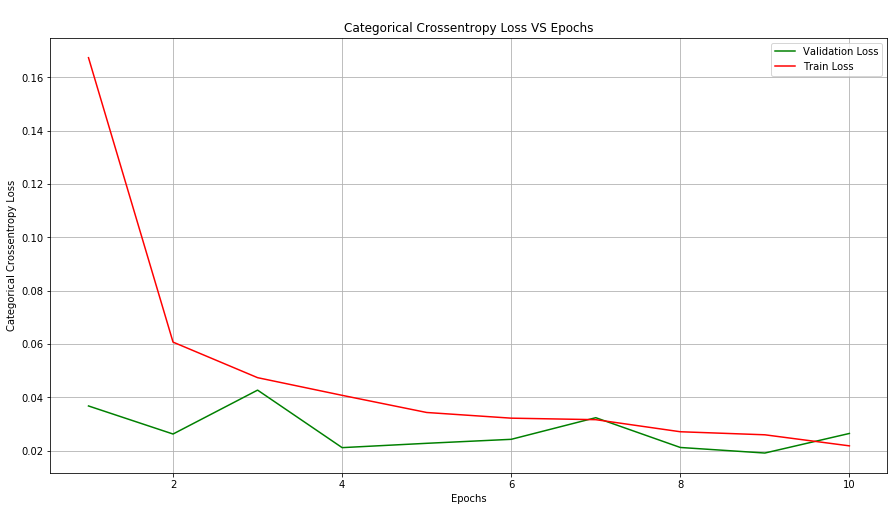

In [26]:
# Evaluating the model
score = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_3_test = score[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### 2. CNN with 5 Convolutional layers and kernel size - (5X5)

In [39]:
from keras.layers import ZeroPadding2D

#CNN with 3 Convolutional layers and kernel size - (3X3)
print(input_shape)
#28*28

#defining first model
model_2 = Sequential()

#first convolution layer
model_2.add(Conv2D(16, kernel_size=(5,5), activation='relu',padding='same', input_shape=input_shape))
#28*28*16

#second convolution layer
model_2.add(Conv2D(32, (5,5), activation='relu'))
#24*24*32

#maxpool layer
model_2.add(MaxPooling2D(pool_size=(2, 2)))
#12*12*32

#adding dropout
model_2.add(Dropout(0.25))

#third convolution layer
model_2.add(Conv2D(64, (5,5), activation='relu',padding='same'))
#12*12*64

#maxpool layer
model_2.add(MaxPooling2D(pool_size=(2, 2)))
#6*6*64

#adding dropout
model_2.add(Dropout(0.50))

#fourth convolution layer
model_2.add(Conv2D(128, (5,5), activation='relu',padding='valid'))
model_2.add(ZeroPadding2D(padding=(2, 2), data_format=None))
#6*6*128

#fifth convolution layer
model_2.add(Conv2D(128, (5,5), activation='relu'))
#2*2*128

#maxpool layer
model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

#adding dropout
model_2.add(Dropout(0.30))

model_2.add(Flatten())

#adding first hidden layer
model_2.add(Dense(512, activation='relu', kernel_initializer=he_normal(seed=None)))

model_2.add(BatchNormalization())

model_2.add(Dropout(0.5))

model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

(28, 28, 1)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 32)        12832     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 12, 12, 64)        51264     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 6, 6,

In [40]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2627 - acc: 0.9160 - val_loss: 0.0478 - val_acc: 0.9854
Epoch 2/10
 - 5s - loss: 0.0796 - acc: 0.9775 - val_loss: 0.0291 - val_acc: 0.9913
Epoch 3/10
 - 6s - loss: 0.0569 - acc: 0.9838 - val_loss: 0.0208 - val_acc: 0.9932
Epoch 4/10
 - 5s - loss: 0.0476 - acc: 0.9865 - val_loss: 0.0236 - val_acc: 0.9928
Epoch 5/10
 - 5s - loss: 0.0430 - acc: 0.9875 - val_loss: 0.0183 - val_acc: 0.9941
Epoch 6/10
 - 5s - loss: 0.0367 - acc: 0.9892 - val_loss: 0.0176 - val_acc: 0.9940
Epoch 7/10
 - 5s - loss: 0.0361 - acc: 0.9897 - val_loss: 0.0229 - val_acc: 0.9933
Epoch 8/10
 - 5s - loss: 0.0318 - acc: 0.9910 - val_loss: 0.0217 - val_acc: 0.9942
Epoch 9/10
 - 5s - loss: 0.0278 - acc: 0.9918 - val_loss: 0.0258 - val_acc: 0.9922
Epoch 10/10
 - 5s - loss: 0.0303 - acc: 0.9914 - val_loss: 0.0199 - val_acc: 0.9942


Test score: 0.01994788905597852
Test accuracy: 0.9942


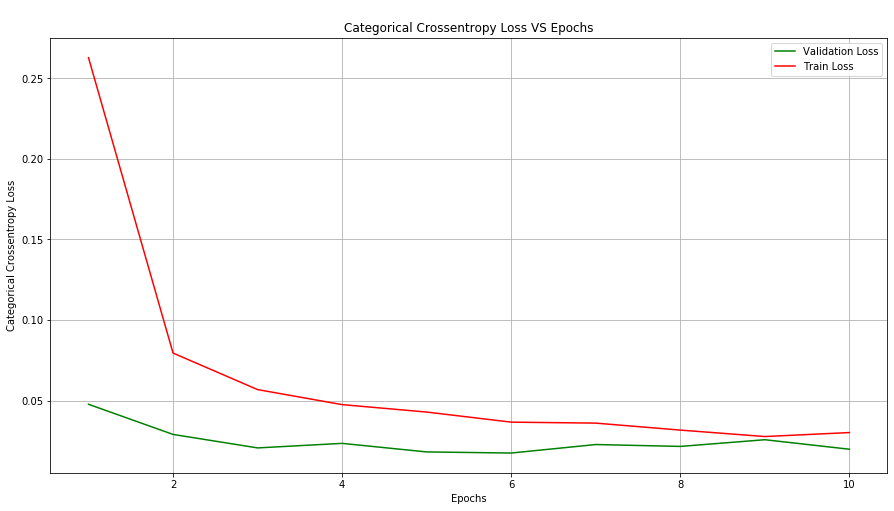

In [42]:
# Evaluating the model
score = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_3_test = score[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### 3. **CNN** with 7 Convolutional layers and kernel size - (2X2)

In [43]:
# Initialising the model
model_7 = Sequential()

# Adding first conv layer
model_7.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))

# Adding second conv layer
model_7.add(Conv2D(32, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(3, 3), strides=(1,1)))

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding third conv layer
model_7.add(Conv2D(64, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


# Adding fourth conv layer
model_7.add(Conv2D(64, (2, 2),padding='same',activation='relu'))

# Adding fifth conv layer
model_7.add(Conv2D(128, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(3, 3),padding='same'))

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding sixth conv layer
model_7.add(Conv2D(128, (2, 2),padding='same',activation='relu'))

# Adding seventh conv layer
model_7.add(Conv2D(256, (2, 2), activation='relu'))

# Adding Maxpooling layer
model_7.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding flatten layer
model_7.add(Flatten())

# Adding first hidden layer
model_7.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Batch Normalization
model_7.add(BatchNormalization())

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding second hidden layer
model_7.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Dropout
model_7.add(Dropout(0.3))

# Adding output layer
model_7.add(Dense(num_classes, activation='softmax'))

# Printing model Summary
print(model_7.summary())

# Compiling the model
model_7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_7 = model_7.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 24, 24, 64)        8256      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 12, 12, 64)      

Test score: 0.01948623714475907
Test accuracy: 0.9948


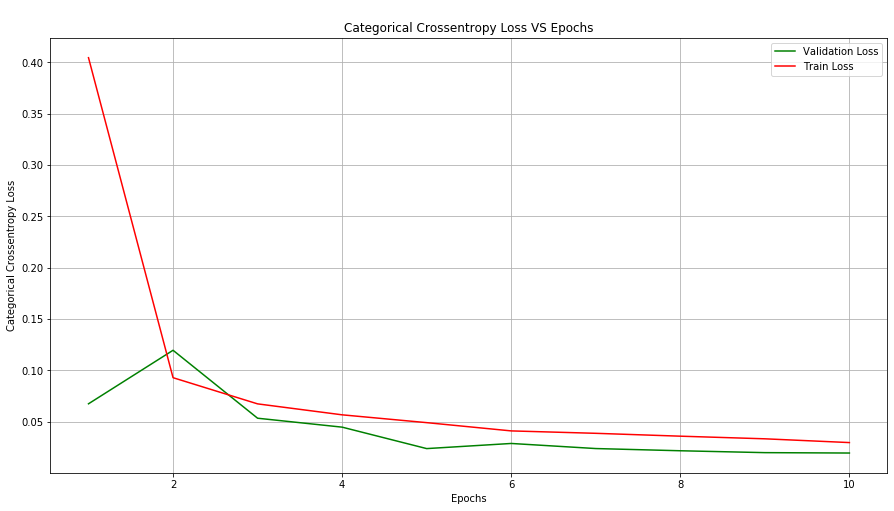

In [45]:
# Evaluating the model
score = model_7.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_3_test = score[1]
model_3_train = max(history_7.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history_7.history['val_loss']
# Training loss
ty = history_7.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### CONCLUSION

## (a). Procedure Followed :

1. Load MNIST dataset.
2. Split the dataset into train and test.
3. Normalize the train and test data.
4. Convert class variable into categorical data vector.
5. Implement Softmax classifier with Kernel Size of 3, 5 and 7 conv layers .
6. Use kernel -size (3X3) , (5X5) and (2,2) .
7. Draw Categorical Crossentropy Loss VS No.of Epochs plot .

### (b) Table (Different models with their train and test accuracies):¶

In [47]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["No_Conv_Layers", "Kernel_size", "Training Accuracy", "Test Accuracy"]

x.add_row([3, "(3x3)",0.9931,0.9913])
x.add_row([5, "(5x5)",0.9914,0.9942])
x.add_row([7, "(2x2)",0.9911,0.9948])
print(x)

+----------------+-------------+-------------------+---------------+
| No_Conv_Layers | Kernel_size | Training Accuracy | Test Accuracy |
+----------------+-------------+-------------------+---------------+
|       3        |    (3x3)    |       0.9931      |     0.9913    |
|       5        |    (5x5)    |       0.9914      |     0.9942    |
|       7        |    (2x2)    |       0.9911      |     0.9948    |
+----------------+-------------+-------------------+---------------+
